In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats
data=pd.read_csv('C:\\Users\\gus10\\Desktop\\MovieViewing\\dataPreprocessing\\k_movie.csv')
data

,Unnamed: 0,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT
0,0,산상수훈,유영의,(주)그란,"이언픽쳐스,(주)그란",20171207,개봉영화,장편,한국,71.0,284.0,284.000000,드라마,전체관람가,독립/예술영화,3.00,6.30
1,1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",커넥트픽쳐스(주),20190516,개봉영화,장편,한국,200.0,154.0,154.000000,다큐멘터리,전체관람가,독립/예술영화,NaN,9.31
2,2,기생충,봉준호,(주)바른손이앤에이,(주)씨제이이엔엠,20190530,개봉영화,장편,한국,1948.0,227811.0,97354.000000,드라마,15세이상관람가,일반영화,9.06,8.49
3,4,김복동,송원근,한국탐사저널리즘센터,(주)엣나인필름,20190808,개봉영화,장편,한국,366.0,110.0,28241.943218,다큐멘터리,12세이상관람가,독립/예술영화,6.60,8.83
4,5,이타미 준의 바다,정다운,기린그림,(주)영화사 진진,20190815,개봉영화,장편,한국,57.0,144.0,144.000000,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,528,투란도트 어둠의 왕국,김시우,(주)나인테일즈코리아,주식회사 블루필름웍스,2022-08-,개봉영화,장편,한국,18.0,966.0,197.000000,뮤지컬,12세이상관람가,일반영화,5.00,9.44
321,530,2차 송환,김동원,푸른영상,(주)시네마달,2022-09-,개봉영화,장편,한국,16.0,415.0,373.000000,다큐멘터리,12세이상관람가,독립/예술영화,8.20,6.44
322,537,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,주식회사 씨엠닉스,2022-09-,개봉영화,장편,한국,9.0,395.0,250.000000,미스터리,15세이상관람가,독립/예술영화,NaN,7.47
323,541,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,(주)트리플픽쳐스,2022-09-,개봉영화,장편,한국,6.0,662.0,336.000000,액션,12세이상관람가,독립/예술영화,NaN,8.84


In [2]:
#서울은 국내 가장 큰 도시이므로 서울관람객이 많은 영화가 흥행할 것이다
data=data.dropna(subset=['VIEWNG_NMPR_CO', 'SEOUL_VIEWNG_NMPR_CO'])
data

,Unnamed: 0,MOVIE_NM,DRCTR_NM,MAKR_NM,DISTB_CMPNY_NM,OPN_DE,MOVIE_TY_NM,MOVIE_STLE_NM,NLTY_NM,TOT_SCRN_CO,VIEWNG_NMPR_CO,SEOUL_VIEWNG_NMPR_CO,GENRE_NM,GRAD_NM,MOVIE_SDIV_NM,CRITIC_RT,VIEWER_RT
0,0,산상수훈,유영의,(주)그란,"이언픽쳐스,(주)그란",20171207,개봉영화,장편,한국,71.0,284.0,284.000000,드라마,전체관람가,독립/예술영화,3.00,6.30
1,1,교회오빠,이호경,"KBS,커넥트픽쳐스(주)",커넥트픽쳐스(주),20190516,개봉영화,장편,한국,200.0,154.0,154.000000,다큐멘터리,전체관람가,독립/예술영화,NaN,9.31
2,2,기생충,봉준호,(주)바른손이앤에이,(주)씨제이이엔엠,20190530,개봉영화,장편,한국,1948.0,227811.0,97354.000000,드라마,15세이상관람가,일반영화,9.06,8.49
3,4,김복동,송원근,한국탐사저널리즘센터,(주)엣나인필름,20190808,개봉영화,장편,한국,366.0,110.0,28241.943218,다큐멘터리,12세이상관람가,독립/예술영화,6.60,8.83
4,5,이타미 준의 바다,정다운,기린그림,(주)영화사 진진,20190815,개봉영화,장편,한국,57.0,144.0,144.000000,다큐멘터리,전체관람가,독립/예술영화,6.50,8.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,528,투란도트 어둠의 왕국,김시우,(주)나인테일즈코리아,주식회사 블루필름웍스,2022-08-,개봉영화,장편,한국,18.0,966.0,197.000000,뮤지컬,12세이상관람가,일반영화,5.00,9.44
321,530,2차 송환,김동원,푸른영상,(주)시네마달,2022-09-,개봉영화,장편,한국,16.0,415.0,373.000000,다큐멘터리,12세이상관람가,독립/예술영화,8.20,6.44
322,537,당신의 이웃은 친절하지 않다,안드로,(주)빅픽처,주식회사 씨엠닉스,2022-09-,개봉영화,장편,한국,9.0,395.0,250.000000,미스터리,15세이상관람가,독립/예술영화,NaN,7.47
323,541,부적: 남의 운을 빼앗는 자,김세성,머지션스토어,(주)트리플픽쳐스,2022-09-,개봉영화,장편,한국,6.0,662.0,336.000000,액션,12세이상관람가,독립/예술영화,NaN,8.84


In [5]:
import matplotlib as mpl
print(mpl.matplotlib_fname())
print(mpl.get_cachedir())
mpl.rcParams['font.family']='NanumGothic'

c:\Users\gus10\anaconda3\lib\site-packages\matplotlib\mpl-data\matplotlibrc
C:\Users\gus10\.matplotlib


No handles with labels found to put in legend.


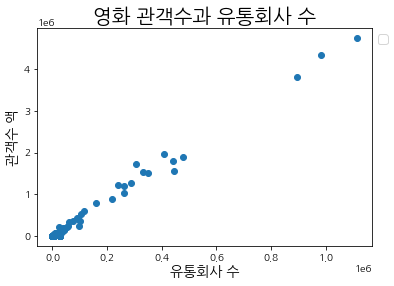

1.0
1113402.0


In [6]:
#유통회사 수에 따른 관객수 변화 plot으로 나타내기
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(data['SEOUL_VIEWNG_NMPR_CO'],
        data['VIEWNG_NMPR_CO'], 
        marker='o', 
        linestyle='')
ax.legend(fontsize=12, bbox_to_anchor=(1,1)) # legend position
plt.title('영화 총 관객수과 서울관객 수', fontsize=20)
plt.xlabel('서울 관객 수', fontsize=14)
plt.ylabel('관객수 액', fontsize=14)
plt.show()

print(min(data['SEOUL_VIEWNG_NMPR_CO']))
print(max(data['SEOUL_VIEWNG_NMPR_CO']))

In [7]:
from scipy.stats import shapiro, levene
#정규분포인지 확인 - 둘다 비정규
print(shapiro(data['VIEWNG_NMPR_CO']))
print(shapiro(data['SEOUL_VIEWNG_NMPR_CO']))

#등분산성 - 등분산성을 따르지 않음
print(levene(data['VIEWNG_NMPR_CO'], data['SEOUL_VIEWNG_NMPR_CO'], center='median'))

ShapiroResult(statistic=0.24710583686828613, pvalue=3.5624646590390443e-34)
ShapiroResult(statistic=0.25528234243392944, pvalue=4.8763312253424235e-34)
LeveneResult(statistic=9.766737815909718, pvalue=0.001856370165176134)


In [8]:
#선형 관계가 있는 지 확인 : 연속-연속 비정규 : spearman - 선형관계가 있음
print(stats.spearmanr(data['VIEWNG_NMPR_CO'],data['SEOUL_VIEWNG_NMPR_CO']))

SpearmanrResult(correlation=0.8708221298388416, pvalue=1.2496207574238194e-101)


In [11]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

fit = ols('VIEWNG_NMPR_CO ~ SEOUL_VIEWNG_NMPR_CO',data=data).fit() ## 단순선형회귀모형 적합
fit.summary() #90% 자료를 설명할 수 있음

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         VIEWNG_NMPR_CO   R-squared:                       0.992
Model:                            OLS   Adj. R-squared:                  0.992
Method:                 Least Squares   F-statistic:                 3.886e+04
Date:                Tue, 06 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:00:42   Log-Likelihood:                -3946.1
No. Observations:                 325   AIC:                             7896.
Df Residuals:                     323   BIC:                             7904.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept            -4648.2017   2600.198     -1.788      0.075   -9763.664     467.260
SEOUL_VIEWNG_NMPR_CO     4.3218      0.022    197.123      0.000       4.279       4.365
==============================================================================
Omnibus:                      144.178   Durbin-Watson:                   1.704
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            13737.038
Skew:                           0.799   Prob(JB):                         0.00
Kurtosis:                      34.810   Cond. No.                     1.22e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
## 변수의 선언
x = data['SEOUL_VIEWNG_NMPR_CO']
y = data['VIEWNG_NMPR_CO']

## 모델의 선언
seoulViewer_linearRegression = LinearRegression()
 
## 모델-데이터셋의 학습 진행
seoulViewer_linearRegression.fit(x.values.reshape(-1,1), y)
 
 
## 예측 실행
print( '10000명의 서울 관객수일때 총 관람 인원 예측 :{}'.format(seoulViewer_linearRegression.predict([[10000]])[0])
    , 'X변수 계수: {}'.format(seoulViewer_linearRegression.coef_[0])
    , sep = '\n')

10000개의 스크린 수 관람 인원 예측 :38570.156429759816
X변수 계수: 4.321835817024817


In [14]:
#기울기
print(seoulViewer_linearRegression.coef_)

#절편
print(seoulViewer_linearRegression.intercept_)

[4.32183582]
-4648.201740488352


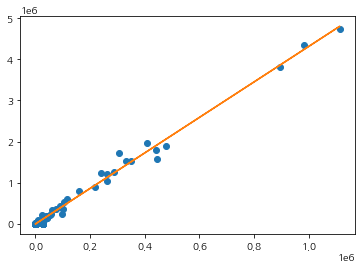

In [15]:
plt.plot(x, y, 'o')
plt.plot(x,seoulViewer_linearRegression.predict(x.values.reshape(-1,1)))
plt.show()